# Simple Linear Regression using sklearn

In [8]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

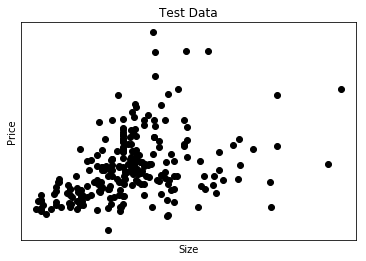

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
import pandas as pd
 
# Load CSV and columns
df = pd.read_csv("Housing.csv")
 
Y = df['price']
X = df['lotsize']
 
X=X.values.reshape(len(X),1)
Y=Y.values.reshape(len(Y),1)
 
# Split the data into training/testing sets
X_train = X[:-250]
X_test = X[-250:]
 
# Split the targets into training/testing sets
Y_train = Y[:-250]
Y_test = Y[-250:]
 
# Plot outputs
_=plt.scatter(X_test, Y_test,  color='black')
_=plt.title('Test Data')
_=plt.xlabel('Size')
_=plt.ylabel('Price')
_=plt.xticks(())
_=plt.yticks(())
plt.show()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

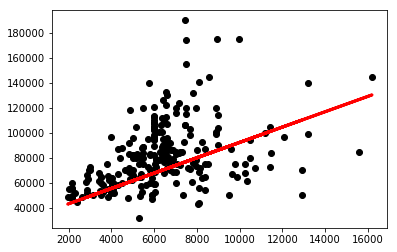

In [10]:
# Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(X_train, Y_train)
# Plot outputs
_=plt.scatter(X_test, Y_test,  color='black')
_=plt.plot(X_test, regr.predict(X_test), color='red',linewidth=3)

In [11]:
#Make an individual prediction
print(str(regr.predict(5000)))
regr.coef_
regr.intercept_

[[ 61622.51528266]]


array([[ 6.13186178]])

array([ 30963.20639361])

# Example to code up regression using ordinary least squares method

In [12]:
# Importing Necessary Libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10.0, 5.0)

# Reading Data
data = pd.read_csv('headbrain.csv')
print(data.shape)
#data.head()

(237, 4)


In [13]:
# Collecting X and Y
X = data['Head Size(cm^3)']
Y = data['Brain Weight(grams)']

In [22]:
# Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

# Total number of values
n = len(X)

# Using the formula to calculate b1 and b2
numer = 0
denom = 0
for i in range(n):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
b = numer / denom
a = mean_y - (b * mean_x)

# Print coefficients
print(a, b)

325.573421049 0.263429339489


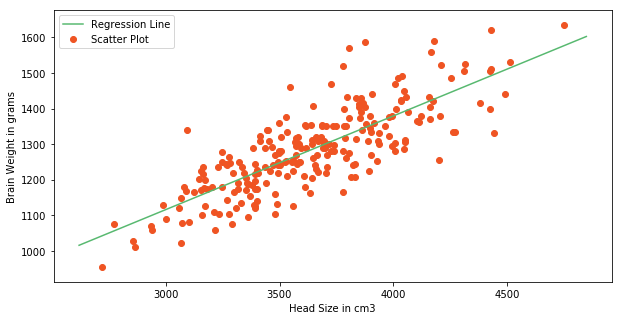

In [19]:
# Plotting Values and Regression Line

max_x = np.max(X) + 100
min_x = np.min(X) - 100

# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = a + b * x

# Ploting Line
_=plt.plot(x, y, color='#58b970', label='Regression Line')
# Ploting Scatter Points
_=plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')

_=plt.xlabel('Head Size in cm3')
_=plt.ylabel('Brain Weight in grams')
_=plt.legend()
plt.show()

In [23]:
# Calculating Root Mean Squares Error
rmse = 0
for i in range(n):
    y_pred = a + b * X[i]
    rmse += (Y[i] - y_pred) ** 2
rmse = np.sqrt(rmse/n)
print(rmse)

72.1206213784


In [24]:
ss_t = 0
ss_e = 0
for i in range(n):
    y_pred = a + b * X[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_e += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_e/ss_t)
print(r2)

0.639311719957


# Multiple Linear Regression using Gradient Descent based approach 

We will be using a student score dataset. In this particular dataset, we have math, reading and writing exam scores of 1000 students. We will try to predict the score of writing exam from math and reading scores.

In [33]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10.0, 5.0)
from mpl_toolkits.mplot3d import Axes3D

data = pd.read_csv('student.csv')
print(data.shape)
data.head()

(1000, 3)


,Math,Reading,Writing
0,48,68,63
1,62,81,72
2,79,80,78
3,76,83,79
4,59,64,62


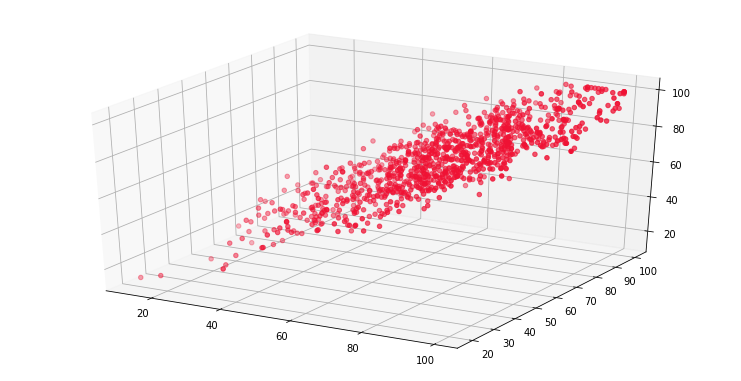

In [34]:
math = data['Math'].values
read = data['Reading'].values
write = data['Writing'].values

# Ploting the scores as scatter plot
fig = plt.figure()
ax = Axes3D(fig)
_=ax.scatter(math, read, write, color='#ef1234')
#plt.show()


In [36]:
m = len(math)
x0 = np.ones(m)
X = np.array([x0, math, read]).T
# Initial Coefficients
B = np.array([0, 0, 0])
Y = np.array(write)
alpha = 0.0001

In [37]:
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J
initial_cost = cost_function(X, Y, B)
print(initial_cost)

2470.11


In [38]:
def gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    
    for iteration in range(iterations):
        # Hypothesis Values
        h = X.dot(B)
        # Difference b/w Hypothesis and Actual Y
        loss = h - Y
        # Gradient Calculation
        gradient = X.T.dot(loss) / m
        # Changing Values of B using Gradient
        B = B - alpha * gradient
        # New Cost Value
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost
        
    return B, cost_history

In [39]:
# 100000 Iterations
newB, cost_history = gradient_descent(X, Y, B, alpha, 100000)

# New Values of B
print(newB)

# Final Cost of new B
print(cost_history[-1])

[-0.47889172  0.09137252  0.90144884]
10.4751234735


C:\Users\gmanish\AppData\Local\Continuum\Anaconda\envs\py36\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  # This is added back by InteractiveShellApp.init_path()


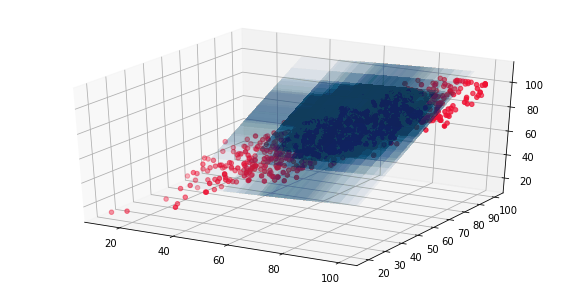

In [31]:
fig = plt.figure()
#ax = Axes3D(fig)
plt3d = plt.figure().gca(projection='3d')
xx, yy = np.meshgrid(math, read)
#features = pd.core.frame.DataFrame({'TV':xx.ravel(),'Radio':yy.ravel()})
out =-0.47889172+xx.ravel()*0.09137252+yy.ravel()+ 0.90144884
#out.reshape(xx.shape)
_=plt3d.plot_surface(xx, yy, out.reshape(xx.shape), alpha=0.01)
# Ensure that the next plot doesn't overwrite the first plot
ax = plt.gca()
_=ax.hold(True)
_=ax.scatter(math, read, write, color='#ef1234')
plt.show()

#ax.plot_surface(xx, yy, out.reshape(xx.shape), color='None')



In [40]:
# Model Evaluation - RMSE
def rmse(Y, Y_pred):
    rmse = np.sqrt(sum((Y - Y_pred) ** 2) / len(Y))
    return rmse

# Model Evaluation - R2 Score
def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = sum((Y - mean_y) ** 2)
    ss_res = sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

Y_pred = X.dot(newB)

print(rmse(Y, Y_pred))
print(r2_score(Y, Y_pred))

4.57714397273
0.909722327306


# Multiple Linear Regression using sklearn 

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# X and Y Values
X = np.array([math, read]).T
Y = np.array(write)

# Model Intialization
reg = LinearRegression()
# Data Fitting
reg = reg.fit(X, Y)
reg.coef_
reg.intercept_
# Y Prediction
Y_pred = reg.predict(X)

# Model Evaluation
rmse = np.sqrt(mean_squared_error(Y, Y_pred))
r2 = reg.score(X, Y)

print(rmse)
print(r2)

array([ 0.09600221,  0.91049989])

-1.4624373849419783

4.57288705184
0.909890172672


# Ridge and Lasso Regression

(10, 10)

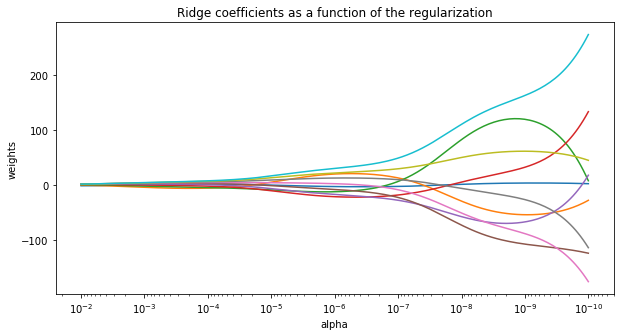

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# X is the 10x10 Hilbert matrix
X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
X.shape
y = np.ones(10)

# Compute paths
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)
#alphas
coefs = []

for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    _=ridge.fit(X, y)
    coefs.append(ridge.coef_)

# Display results
ax = plt.gca()
_=ax.plot(alphas, coefs)
_=ax.set_xscale('log')
_=ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
_=plt.xlabel('alpha')
_=plt.ylabel('weights')
_=plt.title('Ridge coefficients as a function of the regularization')
_=plt.axis('tight')
plt.show()

In [55]:
from sklearn.datasets.samples_generator import make_regression
from sklearn.linear_model import Lasso

X, y = make_regression(n_samples=200, n_features=5000, random_state=0)
X.shape
y.shape
alpha = 0.1
lasso = Lasso(alpha=alpha, fit_intercept=False, max_iter=1000)
lasso.fit(X, y)
lasso.coef_

(200, 5000)

(200,)

Lasso(alpha=0.1, copy_X=True, fit_intercept=False, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

array([-0.,  0., -0., ..., -0.,  0., -0.])